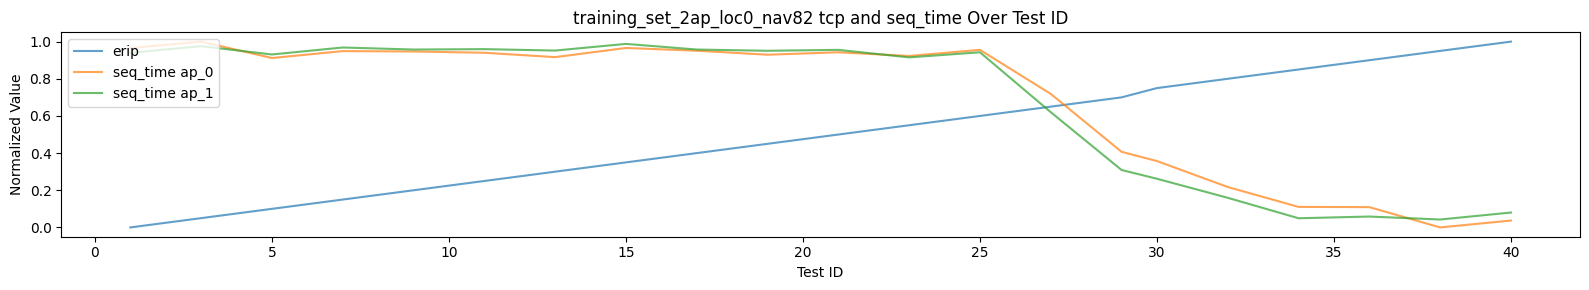

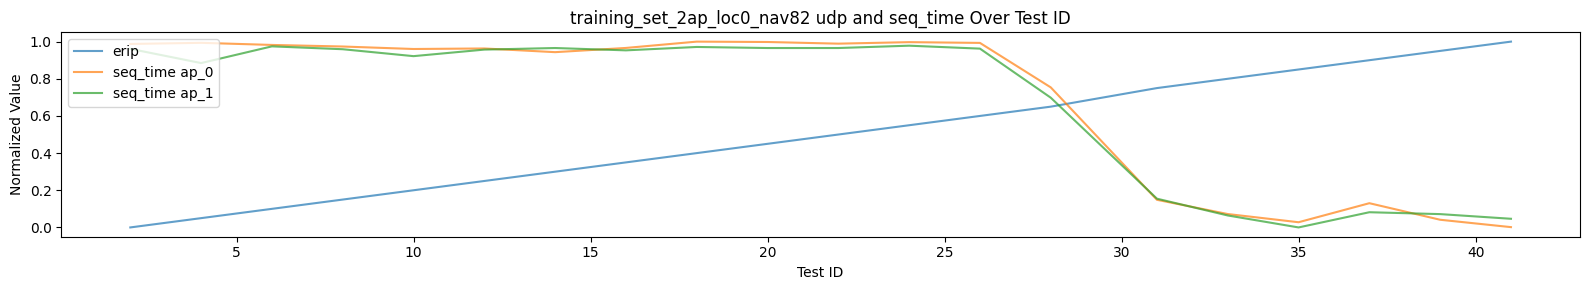

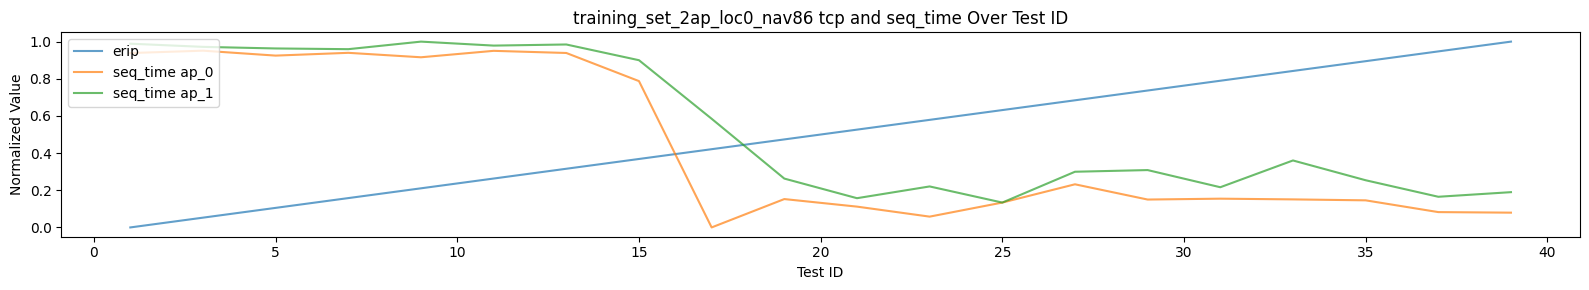

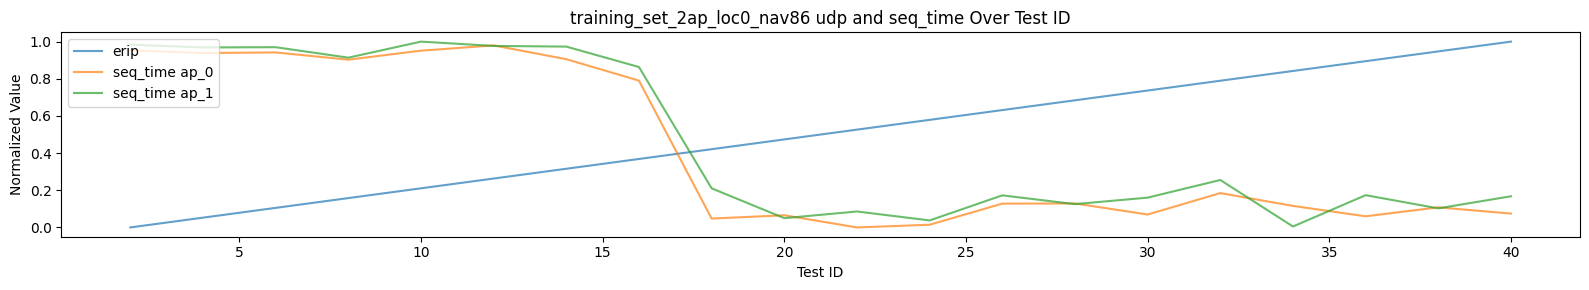

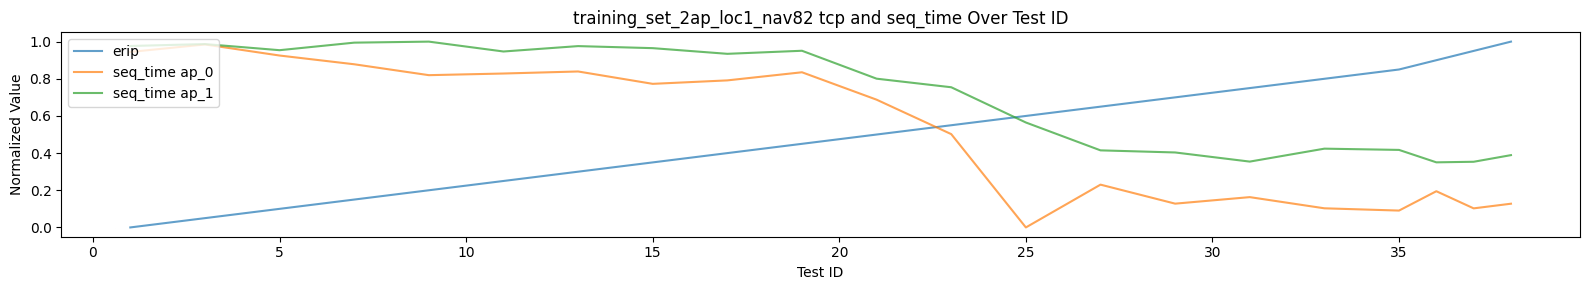

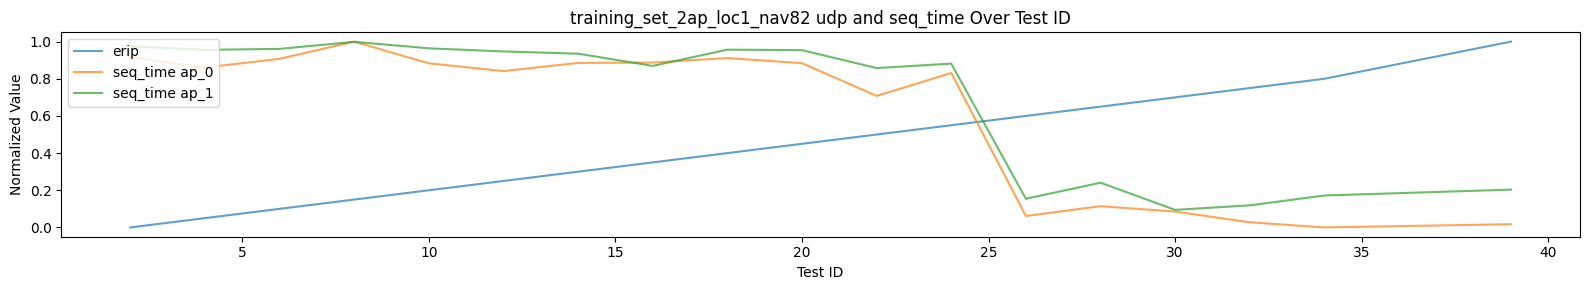

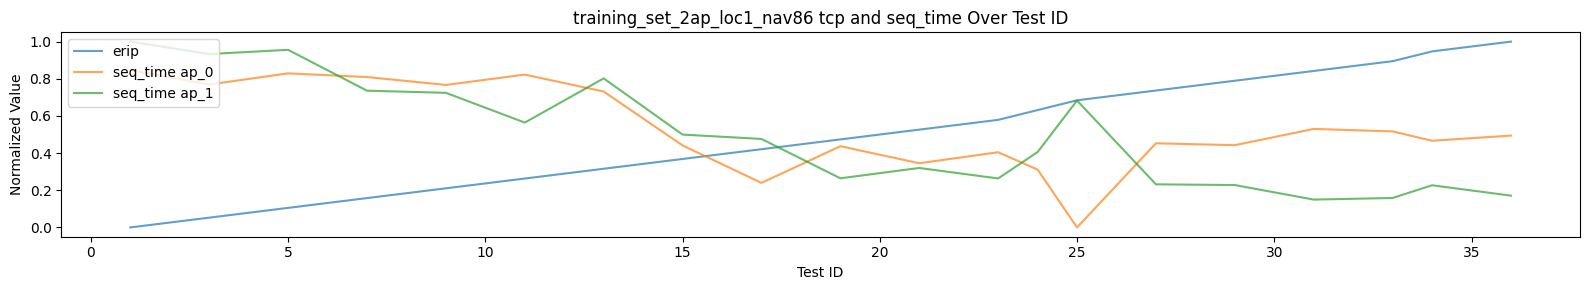

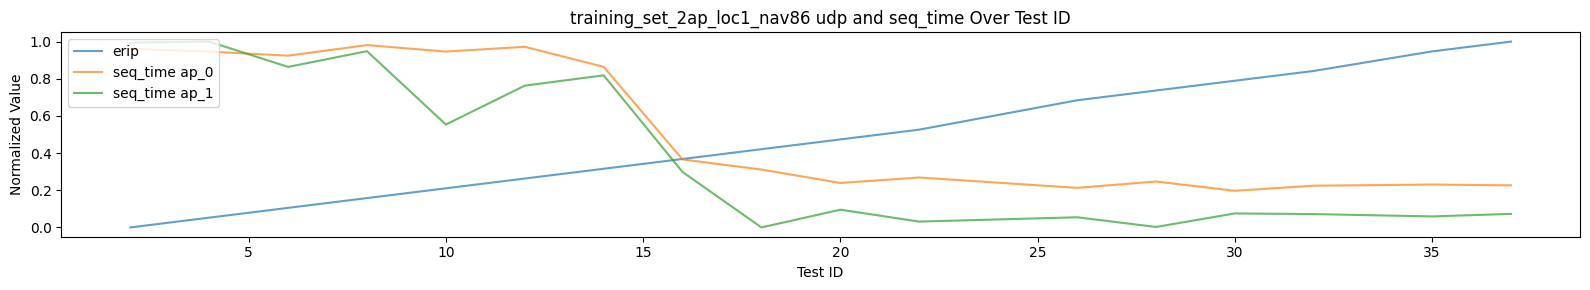

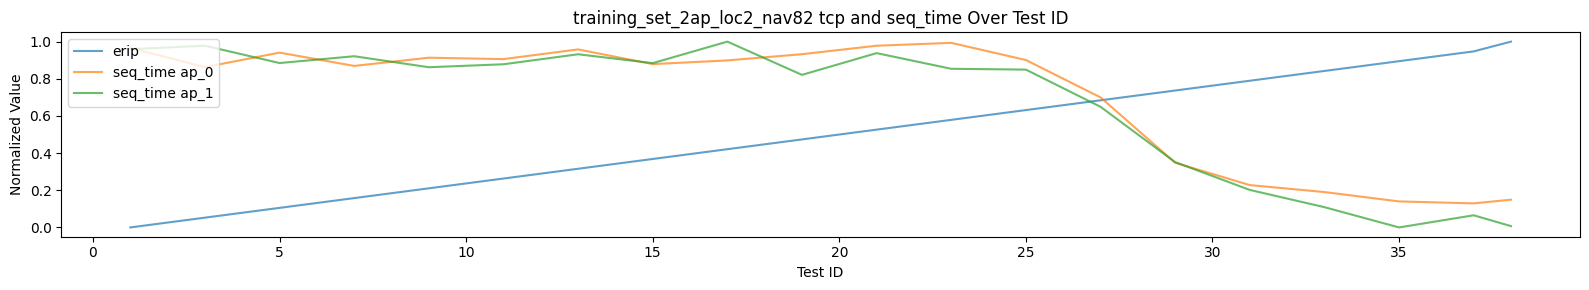

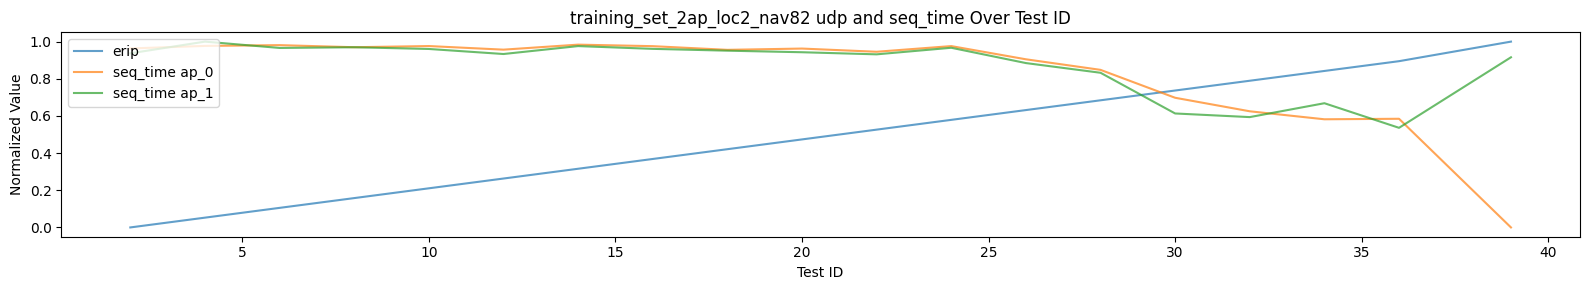

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import os
import numpy as np
import ast


def get_files_by_keywords(directory, keywords):
    # 遍历指定文件夹，根据关键字数组提取文件。
    matched_files = []
    for filename in os.listdir(directory):
        if all(keyword in filename for keyword in keywords):
            matched_files.append(filename)
    return matched_files


def scaler_data(data_to_normalize, columns_to_normalize=["eirp", "seq_time"]):
    # 归一化数值列
    scaler = MinMaxScaler()
    data_scaled = data_to_normalize.copy()
    # 将需要归一化的列转换为float类型
    for column in columns_to_normalize:
        data_scaled[column] = data_scaled[column].astype(float)
    # 归一化
    data_scaled.loc[:, columns_to_normalize] = scaler.fit_transform(data_scaled.loc[:, columns_to_normalize])
    return data_scaled


###### 修改这里 ########
ap_count = "2ap"
project_root = "/Users/daylight/Desktop/macos/1Code/Competition/2024ShuMo"
data_dir = project_root + "/data/B"
training_data_names = get_files_by_keywords(data_dir, ["training", ap_count, "csv"])
training_data_all_path = project_root + f"/data/processed/training_data_{ap_count}.csv"
os.makedirs(os.path.dirname(training_data_all_path), exist_ok=True)
training_data_names = sorted(training_data_names)

columns_to_use = ["test_id", "ap_id", "protocol", "eirp", "seq_time"]
protocol_name = ["tcp", "udp"]
#### ####
for file in training_data_names:
    file_path = os.path.join(data_dir, file)
    data_raw = pd.read_csv(file_path)
    data = data_raw.loc[:, columns_to_use].copy()

    for protocol in protocol_name:
        data_protocol = data[data["protocol"] == protocol]
        data_protocol_scaled = scaler_data(data_protocol, columns_to_normalize=["eirp", "seq_time"])
        data_scaled = data_protocol_scaled
        # 遍历每个 ap_id 组并绘制图表
        plt.figure(figsize=(16, 3))
        plt.plot(data_scaled["test_id"], data_scaled["eirp"], label="erip", alpha=0.7)
        grouped = data_scaled.groupby("ap_id")
        for ap_id, group in grouped:
            # 绘制 seq_time 曲线
            plt.plot(group["test_id"], group["seq_time"], label=f"seq_time {ap_id}", alpha=0.7)
        plt.title(f"{file.split('.')[0]} {protocol} and seq_time Over Test ID")
        plt.xlabel("Test ID")
        plt.ylabel("Normalized Value")
        plt.legend(loc="upper left")
        plt.tight_layout()
        # 展示图像
        plt.show()
###############